In [1]:
import csv
import math
import pandas as pd
from describe import Math_calculat
from describe import DataSet
import numpy as np
import sys

import matplotlib.pyplot as plot

class Histogram:
    def __init__(self, file='datasets/dataset_train.csv', y_col=1, granularity=100):
        self.file_name = file
        self.y_col = y_col
        self.granularity = granularity
        self.col_nb = None

        if type(y_col) != int or y_col < 0 or granularity < 0:
            print ("Error with y_col or granularity")
            sys.exit()
    
    def Plot(self, col_nb):
        ds = DataSet(self.file_name)
        if (type(col_nb) is str):
            index = -1
            if col_nb in ds.dataset[0]:
                col_nb = ds.dataset[0].index(col_nb)
            else:
                print ('Error with name column')
                return

        if not ds.isNumeric_columns(col_nb):
            print ("Input column must is numerics")
            return
        
        col = ds.get_float_col(col_nb)
        statistic = Math_calculat(col)
        bins = np.linspace(statistic.Quartile(0), statistic.Quartile(1), self.granularity)
        color = {
            'Ravenclaw' : 'b',
            'Gryffindor' : 'r',
            'Slytherin' : 'g',
            'Hufflepuff' : 'yellow'
        }
        
        feature = {}
        for i in set(ds.get_col(self.y_col)): feature[i] = []
        for i in range(1, len(ds.dataset)):
            feature[ds.dataset[i][self.y_col]].append(col[i - 1])
        
        for i in feature.keys():
            plot.hist(feature[i], bins, facecolor=color[i], alpha=0.5, label=i)
        plot.legend(loc='upper right')
        plot.ylabel('Frequency')
        plot.xlabel('Value')
        plot.title('Histogram')
        plot.show()
        

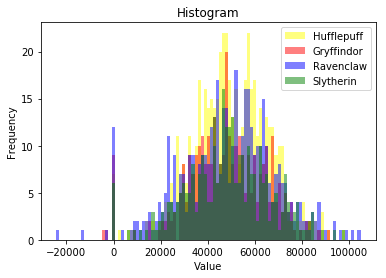

In [2]:
hs = Histogram()
hs.Plot(6)